In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read the file
df = pd.read_csv(r"C:\Users\yasha\OneDrive\Documents\Housing.csv")

In [7]:
#To display the file
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [8]:
#To display the number of rows and columns
df.shape

(545, 13)

In [9]:
#Describes only the numerical part
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [10]:
#Displays the columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
#Displays the unique prices
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [13]:
#Displays the sum of unique prices
df["price"].unique().sum()

1150235940

In [14]:
#Displays number of bathrooms per house uniquely
df["bathrooms"].unique()

array([2, 4, 1, 3], dtype=int64)

In [21]:
#Check for infinite values & replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [23]:
#Drop rows with NaN values
df.dropna(subset = ['price'], inplace=True)
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [24]:
#Set the aesthetic style of plots
sns.set_style("whitegrid") #optional

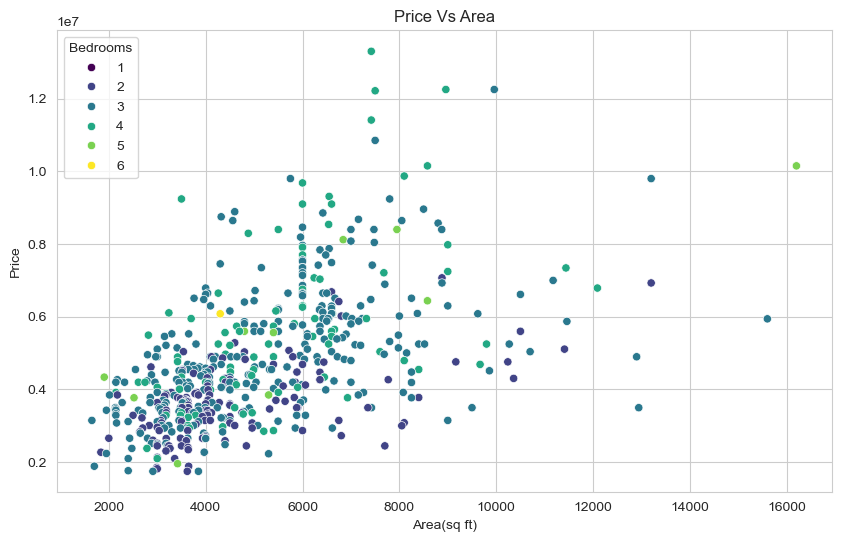

In [26]:
#Scatter Plot of price Vs area
plt.figure(figsize = (10, 6))
sns.scatterplot(x='area',y='price',data=df,hue='bedrooms',palette='viridis')
plt.title('Price Vs Area')
plt.xlabel('Area(sq ft)')
plt.ylabel('Price')
plt.legend(title = 'Bedrooms')
plt.show()

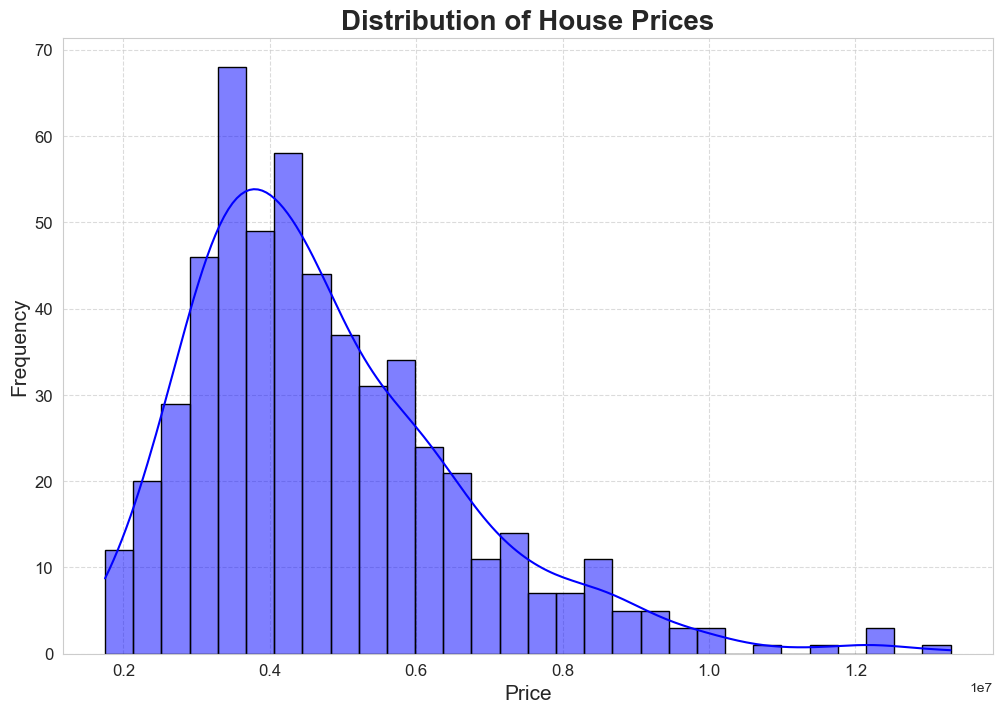

In [28]:
#Distribution Plot of Price
plt.figure(figsize=(12,8))
sns.histplot(df['price'],bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices',fontsize=20,weight='bold')
plt.xlabel('Price',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

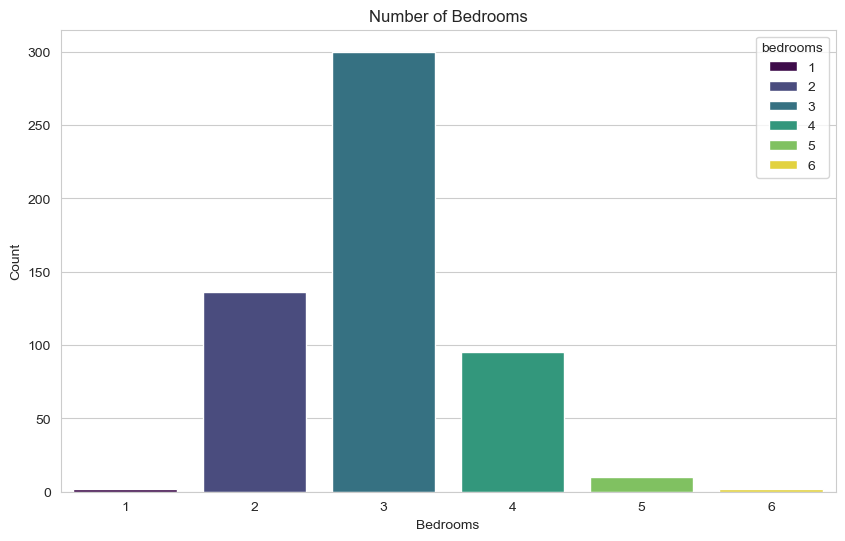

In [39]:
#Count Plot for Bedrooms
plt.figure(figsize = (10, 6))
sns.countplot(x='bedrooms',data=df,hue='bedrooms',palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

In [41]:
#Selecting relevant columns
df=df[['price','area','bedrooms','bathrooms']]
df.head()

price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1

In [43]:
#Creating Independent and DEpendent Variables
X=df[['area','bedrooms','bathrooms']]
y=df['price']
X.shape

(545, 3)

In [45]:
#Splitting the dataset into training & testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#Initializing the linear regression model
model=LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

In [48]:
#Making Predictions
y_pred=model.predict(X_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693419,

In [49]:
#Evaluating the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2750040479309.052
R-Squared: 0.45592991188724463


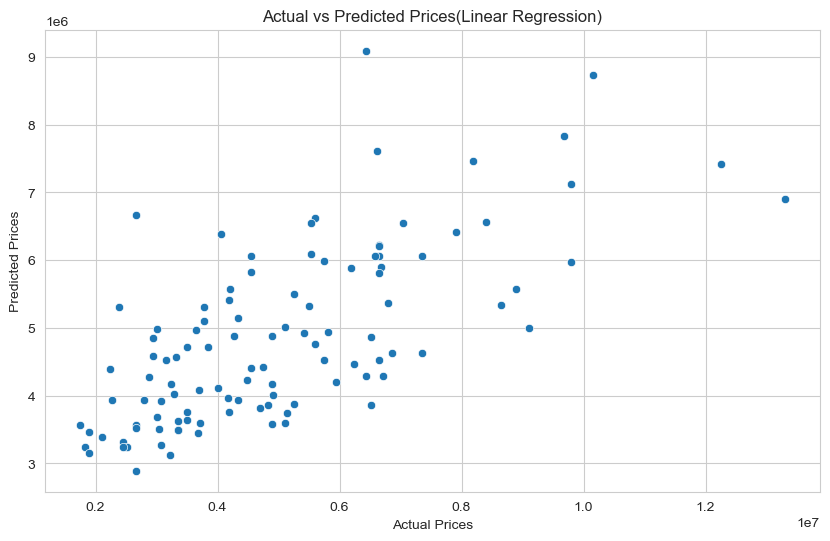

In [50]:
#Visualizing the results
plt.figure(figsize = (10, 6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices(Linear Regression)')
plt.show()

In [ ]:
unseen_data = pd.DataFrame({'area': [1500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(unseen_data)

print(f"Predicted Price for unseen data: {predicted_price[0]}"